O seguinte codigo visa realizar otimização de um portifólio de ativos, pela analise de risco-retorno dos investimentos disponiveis, atribuindo pesos ideias para cada um

A teoria é  baseada na teoria de portifolio moderna, de Harry Markovitz que recebeu o prêmio Nobel de Economia em 1990 por esse estudo

A base proposta é:

- Diversificação, que tem por objetivo diminuir o risco de uma carteira;
- A volatilidade do mercado, que pode mudar em um curto período de tempo;
- A busca por uma boa relação de risco e retorno para o investidor.

importante ressaltar o conceito de risco, sendo baseado pela volatilidade de um ativo, logo analisamos seu desvio padrão X retorno

outro teorema importante de contribuição de markovitz de total correlação é:  determinante chave da taxa esperada de retorno de uma ação é o coeficiente β (beta) da ação  / β = Cov(Ra, Rm) / Var(Rm)

Onde:

Cov(Ra, Rm) = Covariância dos retornos da ação (Ra) e do mercado (Rm)
Var(Rm) = Variância dos retornos do mercado (Rm)

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import os
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.optimize import minimize

In [ ]:
data_inicio = "2015-01-01"
data_fim = dt.now()

In [ ]:
tickers_brasil = [
        "PETR4.SA", "VALE3.SA", "ITUB4.SA", "WEGE3.SA",
        "SUZB3.SA", "JBSS3.SA", "BRFS3.SA", "ABEV3.SA",
        "MRFG3.SA", "SLCE3.SA", "CYRE3.SA", "EGIE3.SA",
        "BEEF3.SA", "COGN3.SA"
    ]

In [ ]:
df = yf.download(tickers_brasil, data_inicio, data_fim)["Close"]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  14 of 14 completed


In [ ]:
df

Ticker,ABEV3.SA,BEEF3.SA,BRFS3.SA,COGN3.SA,CYRE3.SA,EGIE3.SA,ITUB4.SA,JBSS3.SA,MRFG3.SA,PETR4.SA,SLCE3.SA,SUZB3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,
2015-01-02,10.653876,7.181161,55.601166,13.185509,6.964308,13.979865,10.454608,6.996017,3.190595,2.779414,1.339182,16.731821,11.099471,4.949162
2015-01-05,10.461015,6.840284,54.546017,12.223321,7.144248,13.997020,10.507148,7.029173,2.948200,2.541857,1.339182,16.731821,10.932562,4.982904
2015-01-06,10.860037,6.741808,55.037819,11.403681,7.344179,14.279957,10.677112,6.863392,2.903103,2.458712,1.354937,16.731821,11.370697,4.908990
2015-01-07,11.012999,7.188738,57.496864,11.234407,7.537448,14.640066,11.063405,7.055699,3.004570,2.574521,1.398264,16.731821,11.787972,4.852748
2015-01-08,11.676600,7.158436,56.468536,12.116412,7.597427,14.790112,11.236462,7.115380,3.060941,2.740811,1.402202,16.731821,11.913154,4.934699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,13.610000,6.510000,20.139999,2.160000,24.170000,38.400002,31.400000,41.939999,18.700001,37.299999,18.850000,53.400002,57.189999,45.349998
2025-04-02,13.670000,6.580000,19.799999,2.090000,24.129999,38.169998,31.410000,41.439999,18.760000,37.200001,18.760000,53.439999,56.930000,44.900002
2025-04-03,13.850000,6.460000,19.639999,2.180000,25.190001,39.980000,31.969999,41.070000,18.600000,36.000000,18.629999,51.070000,54.869999,44.270000


In [ ]:
log_retorno = np.log(1 + df.pct_change().dropna())
#log_retorno = df.pct_change().apply(lambda x: np.log(1+x)).dropna()
u = log_retorno.mean()
var = log_retorno.var()
stdev = log_retorno.std()
matriz_cov = log_retorno.cov()

#<-------prints------>
print(log_retorno)
print(u)
print(var)
print(stdev)
print(matriz_cov)


Ticker      ABEV3.SA  BEEF3.SA  BRFS3.SA  COGN3.SA  CYRE3.SA  EGIE3.SA  \
Date                                                                     
2015-01-05 -0.018268 -0.048632 -0.019159 -0.075773  0.025509  0.001226   
2015-01-06  0.037434 -0.014501  0.008976 -0.069410  0.027600  0.020012   
2015-01-07  0.013987  0.064187  0.043710 -0.014955  0.025976  0.024905   
2015-01-08  0.058511 -0.004224 -0.018047  0.075580  0.007926  0.010197   
2015-01-09 -0.002421 -0.018153 -0.021933 -0.023811 -0.054994 -0.079922   
...              ...       ...       ...       ...       ...       ...   
2025-04-01  0.008115  0.029620  0.023105  0.032944  0.011234 -0.005195   
2025-04-02  0.004399  0.010695 -0.017026 -0.032944 -0.001656 -0.006008   
2025-04-03  0.013082 -0.018405 -0.008114  0.042161  0.042991  0.046329   
2025-04-04 -0.010160  0.001547 -0.020057 -0.056619 -0.031045 -0.008541   
2025-04-07 -0.039425 -0.004648 -0.002601 -0.014670 -0.006574 -0.014740   

Ticker      ITUB4.SA  JBSS3.SA  MRFG3

In [ ]:
n_carteiras = 100000
retornos_esperados = np.zeros(n_carteiras)
tabela_volatilidade = np.zeros(n_carteiras)
tabela_sharpe_ratio = np.zeros(n_carteiras)
tabela_pesos = np.zeros((n_carteiras, len(tickers_brasil)))

for k in range(n_carteiras):
    pesos = np.random.random(len(tickers_brasil))
    pesos = pesos/np.sum(pesos)
    tabela_pesos[k,:] = pesos

    retornos_esperados[k] = np.sum(u * pesos * 252)
    tabela_volatilidade[k] = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov*252, pesos))) # calculo mais complexo de voltatilidade que apenas uso de stdev


In [ ]:
indice_sharpeMax = tabela_sharpe_ratio.argmax()
tabela_pesos[indice_sharpeMax]
'''
destribuição muito grande entre os ativos, melhor trabalhar com menos ativos
vale destacar a grande importância para ativos com grandes ativos recentes
'''

'\ndestribuição muito grande entre os ativos, melhor trabalhar com menos ativos\nvale destacar a grande importância para ativos com grandes ativos recentes\n'

Agora vamos elaborar a fronteira eficiente

In [ ]:
tabela_retornos_arit = np.exp(retornos_esperados) - 1

In [ ]:
eixoYfronteiraEficiente = np.linspace(tabela_retornos_arit.min(), tabela_retornos_arit.max(), 50)

def retorno(pesoTeste):
  pesoTeste = np.array(pesoTeste)
  retornoTeste = np.sum(u * pesoTeste * 252)
  return retornoTeste


def checkSomaPeso(pesoTeste):
  return np.sum(pesoTeste) - 1

def volatil(pesoTeste):
  pesoTeste = np.array(pesoTeste)
  volTeste = np.sqrt(np.dot(pesoTeste.T, np.dot(matriz_cov*252, pesoTeste)))
  return volTeste

peso = [1/len(tickers_brasil)]*len(tickers_brasil)
lim = tuple([(0,1) for x in tickers_brasil ])

eixoXfronteiraEficiente = []

for retornoTeste in eixoYfronteiraEficiente:
  restrições = ({'type':'eq', 'fun':checkSomaPeso}, {'type':'eq', 'fun':lambda x: retorno(x) - retornoTeste}) #restrições de otimizações 'soma dos pesos < 1' e retorno - retorno possivel(eixo Y) diferença dos vetores
  resultado = minimize(volatil, peso, method='SLSQP', bounds=lim, constraints=restrições)
  eixoXfronteiraEficiente.append(resultado['fun'])

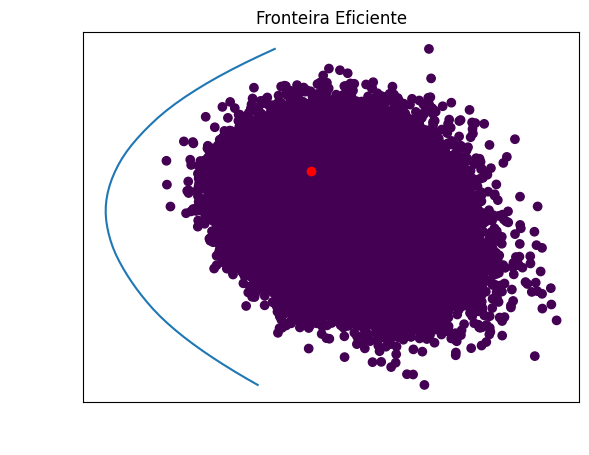

In [ ]:
fig, ax = plt.subplots()

ax.scatter(tabela_volatilidade, tabela_retornos_arit, c=tabela_sharpe_ratio)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.scatter(tabela_volatilidade[indice_sharpeMax], tabela_retornos_arit[indice_sharpeMax],
           c='red')
ax.plot(eixoXfronteiraEficiente, eixoYfronteiraEficiente)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title('Fronteira Eficiente')

#plt.colorbar(label='Sharpe Ratio')
plt.show()

Resultado não otimo, possivelmente devido a desproporcionalidade na quantidade de ativos, prorciona auto diversificação